In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.metrics import Accuracy, Precision, Recall
from keras.models import Sequential

In [2]:
mod3_filename_input = "col_ac"
model_filename_output = "col_ac"

In [3]:
file = open("../assets/mod3/"+mod3_filename_input+".mod3", "rb")
data = pickle.load(file)

In [4]:
train_samples = data['train_samples']
train_labels = data['train_labels']
test_samples = data['test_samples']
test_labels = data['test_labels']

In [5]:
avg = 0
for sample in train_samples:
    avg += sample.size[1]
avg /= len(train_samples)

width = int(avg)
height = 4
channels = 1
input_shape = (width, height, channels)

In [6]:
train_samples_resized = []
for i in range(0, len(train_samples)):
  resized_sample = train_samples[i].resize((height, width))
  train_samples_resized.append(np.array(resized_sample))

test_samples_resized = []
for i in range(0, len(test_samples)):
  resized_sample = test_samples[i].resize((height, width))
  test_samples_resized.append(np.array(resized_sample))

In [7]:
train_samples_resized = np.array(train_samples_resized, dtype='float32')
train_labels = np.array(train_labels, dtype='float32')
test_samples_resized = np.array(test_samples_resized, dtype='float32')
test_labels = np.array(test_labels, dtype='float32')


In [8]:
model = Sequential()
model.add(Conv2D(filters=width, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(2, activation='softmax'))

c:\Users\Gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 3, 63)      │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 1, 63)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1953)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       125,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,517 (498.11 KB)

 Trainable params: 127,517 (498.11 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=[Accuracy(), Precision(), Recall()])

In [11]:
history = model.fit(train_samples_resized, keras.utils.to_categorical(train_labels), epochs=1000)

Epoch 1/1000
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0571 - loss: 0.0839 - precision: 0.9661 - recall: 0.9661
Epoch 2/1000
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1793 - loss: 0.0090 - precision: 0.9971 - recall: 0.9971
Epoch 3/1000
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2175 - loss: 0.0084 - precision: 0.9974 - recall: 0.9974
Epoch 4/1000
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3313 - loss: 0.0039 - precision: 0.9990 - recall: 0.9990
Epoch 5/1000
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1974 - loss: 0.0037 - precision: 0.9984 - recall: 0.9984
Epoch 6/1000
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3365 - loss: 0.0032 - precision: 0.9990 - recall: 0.9990
Epoch 7/1000
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3574 - loss: 0.0024 - precision: 0.9991 - recall: 0.9991
Epoch 8/1000
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3723 - loss: 0.0025 - precision: 0.9992 - recall: 0.9992


In [35]:
model.save(f"../assets/models/{model_filename_output}.h5")

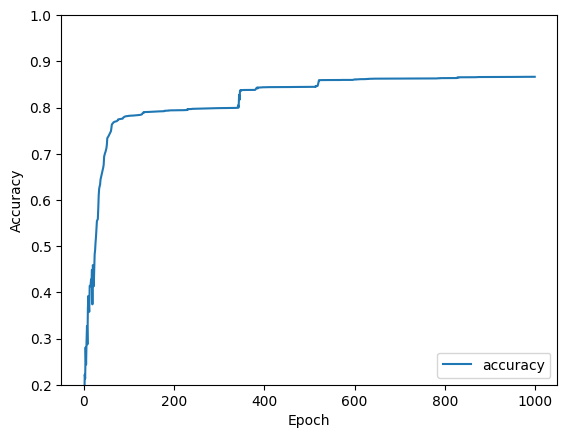

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
plt.show()

In [37]:
test_loss = model.evaluate(test_samples_resized,  keras.utils.to_categorical(test_labels), verbose=2)

194/194 - 0s - 2ms/step - accuracy: 0.8643 - loss: 0.0489 - precision: 0.9987 - recall: 0.9987
